# Import Packages

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from tensorflow.keras.utils import to_categorical

In [8]:
#-- Data Processer --#

def center_crop_image(img):
    h, w = img.shape[:2]
    aspect = h/w
    if aspect > 1:
        offset = int(np.round((h / 2) - (w / 2)))
        return img[offset:w + offset, 0:w]
    else:
        offset = int(np.round((w / 2) - (h / 2)))
        return img[0:h, offset:h + offset]

def process_images(images, image_size):
    cropped_images = [center_crop_image(img) for img in images]
    resized_images = [cv2.resize(img, (image_size, image_size), cv2.INTER_AREA) for img in cropped_images]
    return resized_images

In [4]:
#-- Image processing methods --#

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
    return img_copy

def crop_face(f_cascade, img, scaleFactor = 1.1):
    # convert the image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)
    try:
        x, y, w, h = faces[0]
    except IndexError:
        return None
    return img[y:y+h, x:x+w]

# CNN

In [2]:
from tensorflow.keras.models import load_model

model = load_model('model')

# Face Detect

In [ ]:
!dir data\haarcascades

In [5]:
# Set face detection classifier
haar_face_cascade = cv2.CascadeClassifier('data\haarcascades\haarcascade_frontalface_alt2.xml')

In [6]:
image = crop_face(haar_face_cascade, cv2.imread('B:/image2.jpg'))

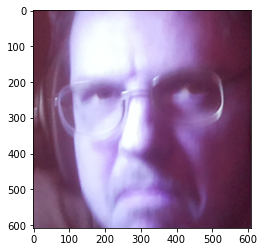

In [7]:
plt.imshow(image)

In [22]:
image_size = 96
image_processed = process_images([image], image_size)

In [25]:
img = np.array(image_processed).reshape(-1, image_size, image_size, 3)

In [27]:
pred = model.predict(img)

In [32]:
print(pred[0])

[5.357474e-13 1.000000e+00]
